In [ ]:
!pip install whois
!pip install --upgrade python-whois
!pip install matplotlib
!pip install socket
!pip install ssl



In [1]:
import ssl
import socket

from datetime import datetime
import pytz

pakistan_timezone = pytz.timezone('Asia/Karachi')

# Get the current time in Pakistan
pakistan_time = datetime.now(pakistan_timezone)

# Format the time as a string
formatted_time = pakistan_time.strftime('%Y-%m-%d %H:%M:%S %Z')



with open('stats.txt', 'a') as file:
  file.write(f"\n\n\nDate and time in Pakistan: {formatted_time}\n\n\n")
def is_ssl_enabled(hostname, port=443):
    try:
        # Create a socket connection
        with socket.create_connection((hostname, port)) as sock:
            # Wrap the socket with an SSL context
            with ssl.create_default_context().wrap_socket(sock, server_hostname=hostname) as ssock:
                # If the connection is successful, SSL is enabled
                return True
    except ssl.SSLError:
        # SSL connection failed, SSL is not enabled
        return False
    except socket.error:
        # Socket connection failed, SSL is not enabled
        return False

# Example usage

website = str(input("Enter website url :: "))

web = website.replace("https://", "")
web = web.replace("/", "")

if is_ssl_enabled(web):

    with open('stats.txt', 'a') as file:
      file.write(f"SSL is enabled on {website}")

    with open('ssl_ratio.txt', 'a') as f:
      f.write(f"True\n")

      print(f"SSL is enabled on {website}")
else:
    with open('stats.txt', 'a') as file:
      file.write(f"SSL is not enabled on {website}")

    with open('ssl_ratio.txt', 'a') as f:
      f.write(f"False\n")

      print(f"SSL is not enabled on {website}")


import requests
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup
import whois


def get_domain_and_webpages(url):
    # Extract domain from the URL
    parsed_url = urlparse(url)
    domain = parsed_url.netloc

    # Send a request to the URL to get the HTML content
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
        return
    except requests.exceptions.ConnectionError as errc:
        print(f"Error Connecting: {errc}")
        return
    except requests.exceptions.Timeout as errt:
        print(f"Timeout Error: {errt}")
        return
    except requests.exceptions.RequestException as err:
        print(f"Request Exception: {err}")
        return

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all the links from the webpage
    webpages = set()
    for link in soup.find_all('a', href=True):
        absolute_url = urljoin(url, link['href'])
        webpages.add(absolute_url)

    return domain, webpages

def get_whois_info(domain):
    try:
        whois_info = whois.whois(domain)
        return whois_info
    except Exception as e:
        print(f"Error fetching WHOIS information: {e}")
        return None




print("********************************")
# Get URL input from the user
user_url = website

# Get domain and associated webpages
result = get_domain_and_webpages(user_url)

if result is not None:
    domain, webpages = result
    # Continue with the rest of your code
else:
    print("")


# Get WHOIS information
whois_info = get_whois_info(domain)

# Display the results
print(f"\nDomain: {domain}")
print("Webpages:")
with open('stats.txt', 'a') as file:
  file.write(f"\nDomain: {domain}")
  file.write("Webpages:\n")
for webpage in webpages:
  with open('stats.txt', 'a') as file:
    file.write(webpage)
  print(webpage)

if whois_info:
  with open('stats.txt', 'a') as file:
    file.write("\n\nWhoIS Information\n")
    st = str(whois_info)
    file.write(st)
  print("\nWHOIS Information:")
  print(whois_info)





import requests   # done

def check_for_waf(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }

    response = requests.get(url, headers=headers)

    waf_headers = [
        "X-Frame-Options",
        "Strict-Transport-Security",
        "Content-Security-Policy",
        "X-Content-Type-Options",
    ]

    waf_detected = any(header in response.headers for header in waf_headers)

    if waf_detected:
        with open('stats.txt', 'a') as file:
          file.write(f"\n\nA Web Application Firewall (WAF) is likely in use for {url}.")
        with open('waf_ratio.txt', 'a') as f:
          f.write(f"True\n")
        print(f"A Web Application Firewall (WAF) is likely in use for {url}.")
    else:
        with open('stats.txt', 'a') as file:
          file.write(f"\n\nNo clear indication of a WAF for {url}.")
        print(f"No clear indication of a WAF for {url}.")
        with open('waf_ratio.txt', 'a') as f:
          f.write(f"False\n")


web_app_url = website  # Replace with the URL of the web application you want to check
print(website)
check_for_waf(web_app_url)

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for whois: filename=whois-0.9.27-py3-none-any.whl size=30960 sha256=0b10b7da328e9a2fa767fbeda8e98b2f0f9a274e2344d0f7a3a4f4bd20865b40
  Stored in directory: c:\users\cz 3\appdata\local\pip\cache\wheels\d9\73\f7\3ab8a0847d253c4aeef112b4201d4c0c6cfad1fadbdfa54c96
Successfully built whois
Enter website url :: http://localhost/dvwa/login.php
SSL is not enabled on http://localhost/dvwa/login.php


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\futurize.exe' -> 'C:\\Python312\\Scripts\\futurize.exe.deleteme'



     ---------------------------------------- 0.0/109.6 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/109.6 kB 1.4 MB/s eta 0:00:01
     ---------- ---------------------------- 30.7/109.6 kB 1.4 MB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.6 kB 469.7 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.6 kB 655.4 kB/s eta 0:00:01
     --------------------------------- -- 102.4/109.6 kB 454.0 kB/s eta 0:00:01
     ------------------------------------ 109.6/109.6 kB 424.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     -- ------------------------------------

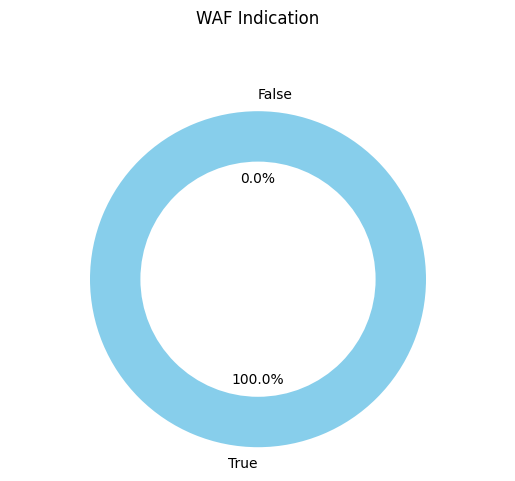

In [ ]:
import matplotlib.pyplot as plt

# Read data from the file
with open('waf_ratio.txt', 'r') as file:
    data = file.read().splitlines()

# Count the occurrences of 'True' and 'False'
true_count = data.count('True')
false_count = data.count('False')

# Data for the donut chart
labels = ['True', 'False']
sizes = [true_count, false_count]

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Create a white circle to make a donut chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('WAF Indication\n\n\n')
plt.show()


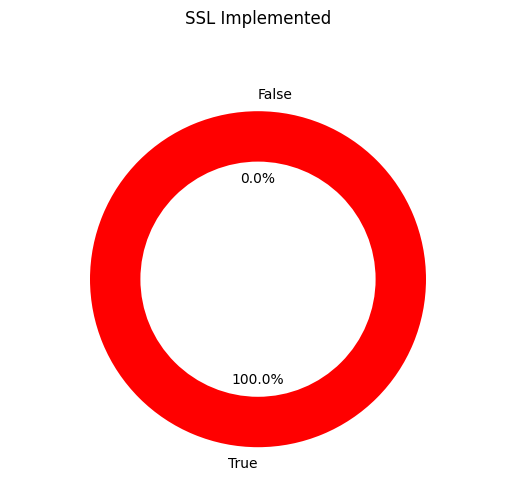

In [ ]:
import matplotlib.pyplot as plt

# Read data from the file
with open('ssl_ratio.txt', 'r') as file:
    data = file.read().splitlines()

# Count the occurrences of 'True' and 'False'
true_count = data.count('True')
false_count = data.count('False')

# Data for the donut chart
labels = ['True', 'False']
sizes = [true_count, false_count]

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['Red', 'lightcoral'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Create a white circle to make a donut chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('SSL Implemented\n\n\n')
plt.show()
